/home/luis/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


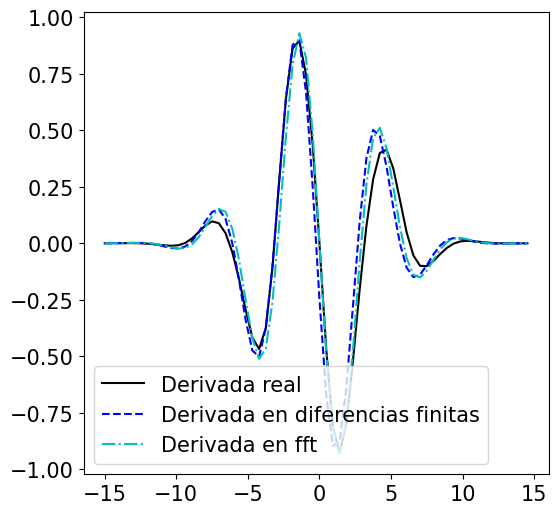

In [1]:
# Ejemplo 1: Comparación entre derivadas (Analítica, Diferencias Finitas y FFT)
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams.update({'font.size':15})

n = 64
L = 30
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_')
Nt = 1000 #Numero de puntos en la discretización temporal
f = np.cos(x) * np.exp(-np.power(x,2)/25)
df = -(np.sin(x) * np.exp(-np.power(x,2)/25 + (2/25)*x*f))

# # Otras funciones y sus derivadas analíticas de ejemplo:
# f = np.power(x,3) * np.exp(-np.power(x,2))
# df = 3 * np.power(x,2) * np.exp(-np.power(x,2) + 2*x*f)
# f = np.e**x
# df = np.e**x
# f = abs((0.5) * (50) * (3.3) * np.power(x,2))
# df = abs(2 * (0.5) * (50) * (3.3) * x)
# f = np.cos(x) * np.sum(-np.power(x,2)/100)
# df = -(np.sin(x) * np.sum(-np.power(x,2)/100) + (2/100 *x*f))

# diferencias finitas
dfFD = np.zeros(len(df),dtype = 'complex_')
for kappa in range(len(df)-1):
    dfFD[kappa] = (f[kappa+1]-f[kappa])/dx
dfFD[-1] = dfFD[-2]

# derivadas espectrales (usando fft)
fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)
kappa = np.fft.fftshift(kappa)
dfhat = kappa * fhat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))

#graficos
plt.plot(x,df.real,color='k', label='Derivada real')
plt.plot(x,dfFD.real,'--',color='b', label='Derivada en diferencias finitas')
plt.plot(x,dfFFT.real,'-.',color='c', label='Derivada en fft')
plt.legend()
plt.show()

/home/luis/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


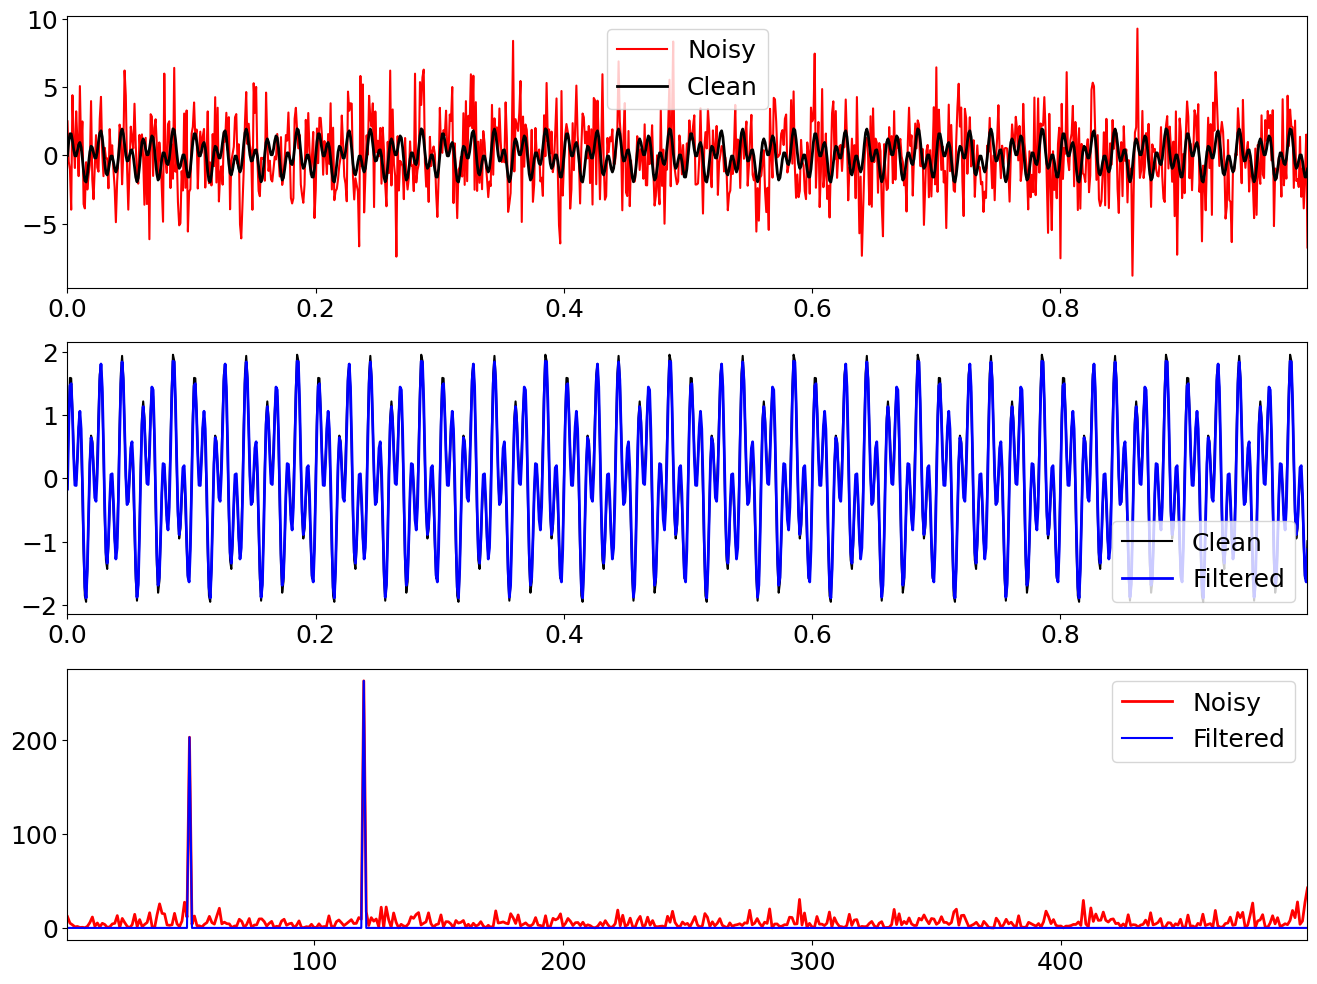

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

## Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()